In [6]:
# from nltk.classify import NaiveBayesClassifier
# from nltk.corpus import subjectivity
# # from nltk.sentiment import SentimentAnalyzer
# from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk import tokenize

import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt

from datetime import datetime
import matplotlib.dates as mdates
import importlib
import plotly.express as px
import base64

#from src.utils.keywords import get_event_metadata
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#from wordcloud import WordCloud, STOPWORDS
# import io
# from PIL import Image

from src.utils.analysis_tools import *
#from text_processing import *

from src.utils import keywords
from src.utils import analysis_tools
from src.scripts import filters

In [7]:
path_paper = 'data/paper_results.csv'
paper = pd.read_csv(path_paper, sep=";")
path_final= 'data/final_classified_filtered_dataset.csv'
final_df = pl.read_csv(path_final, separator=",")

In [4]:
def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)['compound']
    return score


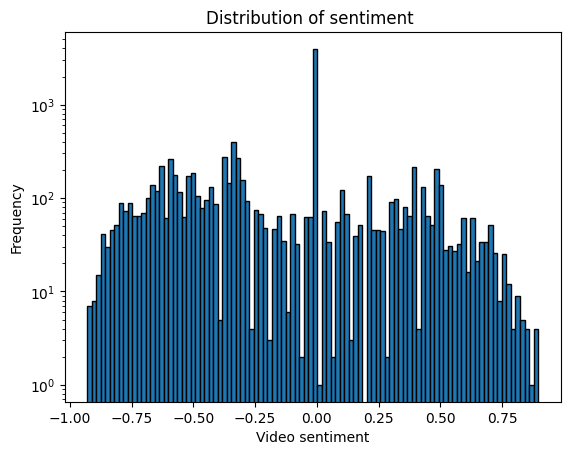

In [9]:
pd_final = final_df.to_pandas()
pd_final["sentiment"] = pd_final["title"].apply(vader_sentiment)
plt.hist(pd_final["sentiment"], bins= 100, edgecolor='black')
plt.xlabel('Video sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of sentiment ')
plt.yscale('log')
plt.show()

In [15]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('YouTube videos uploaded by category',  'YouTube videos viewed by category'), 
                    specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(
    go.Pie(
        values=paper["videos"], 
        labels=paper["category"],
        hovertemplate = 'Category: %{label} <br> Views: %{value} <extra></extra>'  
    ),
    row=1, col=1
)
fig.add_trace(
    go.Pie(
        values=paper["views"], 
        labels=paper["category"],
        hovertemplate='Category: %{label} <br> Views: %{value} <extra></extra>',
    ),
    row=1, col=2
)
fig.update_layout(margin=dict(l=30, r=100, t=20, b=20))
fig.show()
fig.write_html("src/plots/intro_pie.html")

In [11]:
# all
plot_word_cloud(pd_final["title"], "fig0", "over all videos")  #all    
plot_word_cloud(pd_final[pd_final["region"] == "US"]["title"], "fig1", "all videos in the US")  #US
plot_word_cloud(pd_final[pd_final["region"] == "Asia"]["title"], "fig2", "all videos in Asia")  #Asia   
plot_word_cloud(pd_final[pd_final["region"] == "Europe"]["title"], "fig3", "all videos in Europe")  #Europa
# natural
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"]["title"], "fig4","natural disasters" )
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"][pd_final["region"] == "US"]["title"], "fig5", "natural disasters in the US")
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"][pd_final["region"] == "Asia"]["title"], "fig6", "natural disasters in Asia")
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"][pd_final["region"] == "Europe"]["title"], "fig7" , "natural disasters in Europe")
# geoplitical
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"]["title"], "fig8", "geoplitical conflicts")
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"][pd_final["region"] == "US"]["title"], "fig9", "geoplitical conflicts US")
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"][pd_final["region"] == "Asia"]["title"], "fig10", "geoplitical conflicts Asia")
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"][pd_final["region"] == "Europe"]["title"], "fig11", "geoplitical conflicts Europe")

C:\Users\leoga\AppData\Local\Temp\ipykernel_43372\2040732383.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_43372\2040732383.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_43372\2040732383.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_43372\2040732383.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_43372\2040732383.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_43372\2040732383.py:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [12]:
from text_processing import *
images = [
    encode_image(f"img/wordclouds/fig{i}") for i in range(12)
]

label_event = ["over all videos", "all videos in the US", "all videos in Asia", "all videos in Europe", 
                "natural disasters", "natural disasters in the US", "natural disasters in Asia", "natural disasters in Europe", 
                "geoplitical conflicts", "geoplitical conflicts US", "geoplitical conflicts Asia", "geoplitical conflicts Europe"]
    

interactive_images("src/plots/wordclouds.html", label_event, images)



In [24]:
sub_df= add_subjectivity(final_df)
sub_df.write_csv('videos_subjectivity.csv')
